### 1. Neural Network for Classification using PyTorch

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



**Model with change in number of layers**

In [2]:
# **************************************Model-1***********************************************
err11=[]
input_size = 784
hidden_sizes1 = [392,392,392,392]
output_size = 10
model1 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], hidden_sizes1[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[2], hidden_sizes1[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-1:")
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer1.zero_grad()
        output = model1(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer1.step()
        running_loss += loss.item()
    else:
        err11.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))


correct_count1, all_count = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps1 = model1(img)

    ps1 = torch.exp(logps1)
    probab1 = list(ps1.numpy()[0])
    pred_label1 = probab1.index(max(probab1))
    true_label = labels.numpy()[i]
    if(true_label == pred_label1):
      correct_count1 += 1
    all_count += 1

print("\nAccuracy: ", (correct_count1/all_count))


# **************************************Model-2***********************************************

err12=[]
input_size = 784
hidden_sizes2 = [392,392,392]
output_size = 10
model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes2[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[0], hidden_sizes2[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[1], hidden_sizes2[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[2], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-2:")
for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer2.zero_grad()
        output = model2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
    else:
        err12.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

correct_count2,all_count = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps2 = model2(img)

    ps2 = torch.exp(logps2)
    probab2 = list(ps2.numpy()[0])
    pred_label2 = probab2.index(max(probab2))
    true_label = labels.numpy()[i]
    if(true_label == pred_label2):
      correct_count2 += 1
    all_count += 1


print("\nAccuracy: ", (correct_count2/all_count))

#**************************************Model-3***********************************************
err13=[]
input_size = 784
hidden_sizes3 = [392,392]
output_size = 10

model3 = nn.Sequential(nn.Linear(input_size, hidden_sizes3[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[0], hidden_sizes3[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[1], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer3 = optim.SGD(model3.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-3:")
for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer3.zero_grad()
        output = model3(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer3.step()
        running_loss += loss.item()
    else:
        err13.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

correct_count3, all_count = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps3 = model3(img)

    ps3 = torch.exp(logps3)
    probab3 = list(ps3.numpy()[0])
    pred_label3 = probab3.index(max(probab3))
    true_label = labels.numpy()[i]
    if(true_label == pred_label3):
      correct_count3 += 1
    all_count += 1

print("\nAccuracy: ", (correct_count3/all_count))

# **************************************Model-4***********************************************
err14=[]
input_size = 784
hidden_sizes4 = 392
output_size = 10
model4 = nn.Sequential(nn.Linear(input_size, hidden_sizes4),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4, output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer4 = optim.SGD(model4.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-4:")
for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer4.zero_grad()
        output = model4(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer4.step()
        running_loss += loss.item()
    else:
        err14.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))


correct_count4, all_count = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps4 = model4(img)

    ps4 = torch.exp(logps4)
    probab4 = list(ps4.numpy()[0])
    pred_label4 = probab4.index(max(probab4))
    true_label = labels.numpy()[i]
    if(true_label == pred_label4):
      correct_count4 += 1
    all_count += 1

print("\nAccuracy: ", (correct_count4/all_count))


Model-1:
Epoch 0 - Training loss: 1.0373799409598177
Epoch 1 - Training loss: 0.2887535338431025
Epoch 2 - Training loss: 0.19651621407759723
Epoch 3 - Training loss: 0.1448174653284903
Epoch 4 - Training loss: 0.11570125819046868
Epoch 5 - Training loss: 0.09638572401101035
Epoch 6 - Training loss: 0.08317452302621578
Epoch 7 - Training loss: 0.0715127421527116
Epoch 8 - Training loss: 0.06329949993850179
Epoch 9 - Training loss: 0.05677827970206197
Epoch 10 - Training loss: 0.04987882698443272
Epoch 11 - Training loss: 0.04463664526447479
Epoch 12 - Training loss: 0.03751041807738423
Epoch 13 - Training loss: 0.03380868063331383
Epoch 14 - Training loss: 0.030971030185710506

Accuracy:  0.9787

Model-2:
Epoch 0 - Training loss: 0.7486923219107869
Epoch 1 - Training loss: 0.26631879638523054
Epoch 2 - Training loss: 0.1898818638191612
Epoch 3 - Training loss: 0.1447097360988511
Epoch 4 - Training loss: 0.11760090987906972
Epoch 5 - Training loss: 0.10032420822067746
Epoch 6 - Trainin

**Model with different number of nodes**

In [3]:
# **************************************Model-1***********************************************
err41=[]
input_size = 784
hidden_sizes1 = [392,392,392,392]
output_size = 10

model31 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], hidden_sizes1[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[2], hidden_sizes1[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer31 = optim.SGD(model31.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-1:")
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer31.zero_grad()
        output = model31(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer31.step()
        running_loss += loss.item()
    else:
        err41.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))


correct_count31, all_count3 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps31 = model31(img)

    ps31 = torch.exp(logps31)
    probab31 = list(ps31.numpy()[0])
    pred_label31 = probab31.index(max(probab31))
    true_label = labels.numpy()[i]
    if(true_label == pred_label31):
      correct_count31 += 1
    all_count3 += 1

print("\nAccuracy: ", (correct_count31/all_count3))

# **************************************Model-2***********************************************
err42=[]
input_size = 784
hidden_sizes2 = [196,196,196,196]
output_size = 10


model32 = nn.Sequential(nn.Linear(input_size, hidden_sizes2[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[0], hidden_sizes2[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[1], hidden_sizes2[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[2], hidden_sizes2[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer32 = optim.SGD(model32.parameters(), lr=0.003, momentum=0.9)

epochs = 15

print("\nModel-2:")
for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer32.zero_grad()
        output = model32(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer32.step()
        running_loss += loss.item()
    else:
        err42.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

correct_count32, all_count3 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps32 = model32(img)

    ps32 = torch.exp(logps32)
    probab32 = list(ps32.numpy()[0])
    pred_label32 = probab32.index(max(probab32))
    true_label = labels.numpy()[i]
    if(true_label == pred_label32):
      correct_count32 += 1
    all_count3 += 1

print("\nAccuracy: ", (correct_count32/all_count3))

# **************************************Model-3***********************************************
err43=[]
input_size = 784
hidden_sizes3 = [98,98,98,98]
output_size = 10

model33 = nn.Sequential(nn.Linear(input_size, hidden_sizes3[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[0], hidden_sizes3[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[1], hidden_sizes3[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[2], hidden_sizes3[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer33 = optim.SGD(model33.parameters(), lr=0.003, momentum=0.9)
epochs = 15
print("\nModel-3:")

for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer33.zero_grad()
        output = model33(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer33.step()
        running_loss += loss.item()
    else:
        err43.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

correct_count33, all_count3 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps33 = model33(img)
    ps33 = torch.exp(logps33)
    probab33 = list(ps33.numpy()[0])
    pred_label33 = probab33.index(max(probab33))
    true_label = labels.numpy()[i]
    if(true_label == pred_label33):
      correct_count33 += 1
    all_count3 += 1

print("\nAccuracy: ", (correct_count33/all_count3))

# **************************************Model-4***********************************************
err44=[]
input_size = 784
hidden_sizes4 = [49,49,49,49]
output_size = 10

model34 = nn.Sequential(nn.Linear(input_size, hidden_sizes4[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[0], hidden_sizes4[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[1], hidden_sizes4[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[2], hidden_sizes4[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer34 = optim.SGD(model34.parameters(), lr=0.003, momentum=0.9)
epochs = 15

print("\nModel-4:")
for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer34.zero_grad()
        output = model34(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer34.step()
        running_loss += loss.item()
    else:
        err44.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

correct_count34, all_count3 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps34 = model34(img)

    ps34 = torch.exp(logps34)
    probab34 = list(ps34.numpy()[0])
    pred_label34 = probab34.index(max(probab34))

    true_label = labels.numpy()[i]
    if(true_label == pred_label34):
      correct_count34 += 1
    all_count3 += 1

print("\nAccuracy: ", (correct_count34/all_count3))


Model-1:
Epoch 0 - Training loss: 1.0187915922291497
Epoch 1 - Training loss: 0.2862260439820381
Epoch 2 - Training loss: 0.1937362617417884
Epoch 3 - Training loss: 0.14119655017985272
Epoch 4 - Training loss: 0.1123641720706863
Epoch 5 - Training loss: 0.0961809811442455
Epoch 6 - Training loss: 0.0786080991567325
Epoch 7 - Training loss: 0.06775210429353318
Epoch 8 - Training loss: 0.060038256663968094
Epoch 9 - Training loss: 0.053392676885293394
Epoch 10 - Training loss: 0.04678845851531208
Epoch 11 - Training loss: 0.043238741881238905
Epoch 12 - Training loss: 0.03776199135979983
Epoch 13 - Training loss: 0.032778939782162266
Epoch 14 - Training loss: 0.028679581226727396

Accuracy:  0.9786

Model-2:
Epoch 0 - Training loss: 1.1523244801138255
Epoch 1 - Training loss: 0.30203077939750034
Epoch 2 - Training loss: 0.206350162657085
Epoch 3 - Training loss: 0.1534335137660633
Epoch 4 - Training loss: 0.12414546130892279
Epoch 5 - Training loss: 0.10653964209773426
Epoch 6 - Traini

**Model with change in number of epochs**

In [4]:
# **************************************Model-1***********************************************
err61=[]
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10
model51 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))


criterion = nn.NLLLoss()
optimizer51 = optim.SGD(model51.parameters(), lr=0.003, momentum=0.9)
epochs1 = 5
print("\nModel-1: ")
for e in range(epochs1):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer51.zero_grad()
        output = model51(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer51.step() 
        running_loss += loss.item()
    else:
        err61.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

correct_count51,all_count5 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps51 = model51(img)

    ps51 = torch.exp(logps51)
    probab51 = list(ps51.numpy()[0])
    pred_label51 = probab51.index(max(probab51))
    true_label = labels.numpy()[i]
    if(true_label == pred_label51):
      correct_count51 += 1
    all_count5 += 1

print("\nAccuracy: ", (correct_count51/all_count5))


# **************************************Model-2***********************************************
err62=[]
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10


model52 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer52 = optim.SGD(model52.parameters(), lr=0.003, momentum=0.9)
epochs2 = 10

print("\nModel-2:")
for f in range(epochs2):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer52.zero_grad()
        output = model52(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer52.step()
        running_loss += loss.item()
    else:
        err62.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))


correct_count52, all_count5 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps52 = model52(img)

    ps52 = torch.exp(logps52)
    probab52 = list(ps52.numpy()[0])
    pred_label52 = probab52.index(max(probab52))
    true_label = labels.numpy()[i]
    if(true_label == pred_label52):
      correct_count52 += 1
    all_count5 += 1

print("\nAccuracy: ", (correct_count52/all_count5))

# **************************************Model-3***********************************************
err63=[]
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10

model53 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))


criterion = nn.NLLLoss()
optimizer53 = optim.SGD(model53.parameters(), lr=0.003, momentum=0.9)
epochs3 = 15

print("\nModel-3:")
for g in range(epochs3):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer53.zero_grad()
        output = model53(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer53.step()
        running_loss += loss.item()
    else:
        err63.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

correct_count53, all_count5 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps53 = model53(img)

    ps53 = torch.exp(logps53)
    probab53 = list(ps53.numpy()[0])
    pred_label53 = probab53.index(max(probab53))
    true_label = labels.numpy()[i]
    if(true_label == pred_label53):
      correct_count53 += 1
    all_count5 += 1

print("\nAccuracy: ", (correct_count53/all_count5))

# **************************************Model-4***********************************************
err64=[]
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10


model54 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer54 = optim.SGD(model54.parameters(), lr=0.003, momentum=0.9)
epochs4 = 20

print("\nModel-4:")
for h in range(epochs4):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer54.zero_grad()
        output = model54(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer54.step()
        running_loss += loss.item()
    else:
        err64.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

correct_count54, all_count5 = 0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps54 = model54(img)

    ps54 = torch.exp(logps54)
    probab54 = list(ps54.numpy()[0])
    pred_label54 = probab54.index(max(probab54))
    true_label = labels.numpy()[i]
    if(true_label == pred_label54):
      correct_count54 += 1
    all_count5 += 1

print("\nAccuracy: ", (correct_count54/all_count5))


Model-1: 
Epoch 0 - Training loss: 1.0216208187057012
Epoch 1 - Training loss: 0.28783694735325094
Epoch 2 - Training loss: 0.19415833176310254
Epoch 3 - Training loss: 0.14647386829728193
Epoch 4 - Training loss: 0.11759611413474562

Accuracy:  0.9665

Model-2:
Epoch 0 - Training loss: 1.0020904797258408
Epoch 1 - Training loss: 0.288580840215214
Epoch 2 - Training loss: 0.19725797350393304
Epoch 3 - Training loss: 0.14586135052216015
Epoch 4 - Training loss: 0.11930500768196545
Epoch 5 - Training loss: 0.10015468900876322
Epoch 6 - Training loss: 0.08571541069079437
Epoch 7 - Training loss: 0.07361454992636499
Epoch 8 - Training loss: 0.06334821924096597
Epoch 9 - Training loss: 0.05670433638911289

Accuracy:  0.9764

Model-3:
Epoch 0 - Training loss: 0.9862900926137784
Epoch 1 - Training loss: 0.2799052946698437
Epoch 2 - Training loss: 0.1897915910655406
Epoch 3 - Training loss: 0.1437667212300082
Epoch 4 - Training loss: 0.11350210593429519
Epoch 5 - Training loss: 0.096593647921

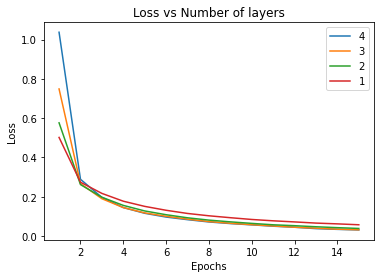

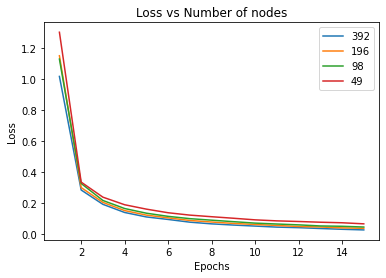

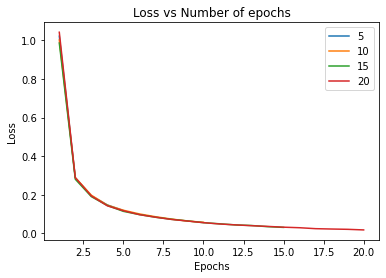

In [5]:
import warnings
warnings.filterwarnings('ignore')

f = plt.figure(figsize=(13,4))

ax = f.add_subplot(121)
plt.plot([i for i in range(1,16)],err11)
plt.plot([i for i in range(1,16)],err12)
plt.plot([i for i in range(1,16)],err13)
plt.plot([i for i in range(1,16)],err14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['4','3','2','1'])
plt.title('Loss vs Number of layers')

plt.show()
ax = f.add_subplot(122)
plt.plot([i for i in range(1,16)],err41)
plt.plot([i for i in range(1,16)],err42)
plt.plot([i for i in range(1,16)],err43)
plt.plot([i for i in range(1,16)],err44)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['392','196','98','49'])
plt.title('Loss vs Number of nodes')

plt.show()
ax = f.add_subplot(122)
plt.plot([i for i in range(1,6)],err61)
plt.plot([i for i in range(1,11)],err62)
plt.plot([i for i in range(1,16)],err63)
plt.plot([i for i in range(1,21)],err64)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['5','10','15','20'])
plt.title('Loss vs Number of epochs')


plt.show()

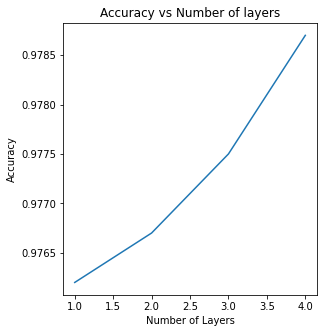

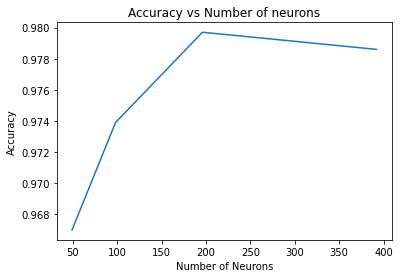

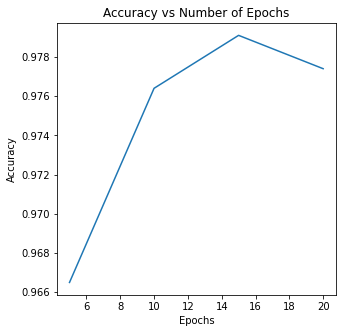

In [6]:
f = plt.figure(figsize=(10,5))

ax = f.add_subplot(121)
plt.plot([4,3,2,1],[(correct_count1/all_count),(correct_count2/all_count),(correct_count3/all_count),(correct_count4/all_count)])
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of layers')
plt.show()

ax = f.add_subplot(122)
plt.plot([392,196,98,49],[(correct_count31/all_count3),(correct_count32/all_count3),(correct_count33/all_count3),(correct_count34/all_count3)])
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of neurons')
plt.show()

f = plt.figure(figsize=(5,5))
plt.plot([5,10,15,20],[(correct_count51/all_count5),(correct_count52/all_count5),(correct_count53/all_count5),(correct_count54/all_count5)])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Epochs')
plt.show()

### 2. Neural Network for Regression using PyTorch

Loading the dataset and Training process

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

class BostonDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)
  def __getitem__(self, i):
      return self.X[i], self.y[i]  

class NN_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(nn.Linear(13, 64),nn.ReLU(),nn.Linear(64, 32),nn.ReLU(),nn.Linear(32, 1))
  def forward(self, x):
    return self.layers(x)

if __name__ == '__main__':
  torch.manual_seed(42)
  X, y = load_boston(return_X_y=True)
  dataset = BostonDataset(X, y)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  model = NN_Model()
  loss_function = nn.L1Loss()
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
  for epoch in range(0, 5): 
    print(f'Starting epoch {epoch+1}')
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = loss_function(outputs, targets)
      loss.backward()
      optimizer.step()
      current_loss += loss.item()
      if i % 10 == 0:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0
  print('Training process has finished.')

Starting epoch 1
Loss after mini-batch     1: 0.043
Loss after mini-batch    11: 0.426
Loss after mini-batch    21: 0.442
Loss after mini-batch    31: 0.461
Loss after mini-batch    41: 0.452
Loss after mini-batch    51: 0.472
Starting epoch 2
Loss after mini-batch     1: 0.047
Loss after mini-batch    11: 0.432
Loss after mini-batch    21: 0.450
Loss after mini-batch    31: 0.434
Loss after mini-batch    41: 0.485
Loss after mini-batch    51: 0.434
Starting epoch 3
Loss after mini-batch     1: 0.049
Loss after mini-batch    11: 0.458
Loss after mini-batch    21: 0.435
Loss after mini-batch    31: 0.423
Loss after mini-batch    41: 0.417
Loss after mini-batch    51: 0.480
Starting epoch 4
Loss after mini-batch     1: 0.051
Loss after mini-batch    11: 0.436
Loss after mini-batch    21: 0.417
Loss after mini-batch    31: 0.452
Loss after mini-batch    41: 0.447
Loss after mini-batch    51: 0.438
Starting epoch 5
Loss after mini-batch     1: 0.043
Loss after mini-batch    11: 0.442
Loss 

Code involving Prediction and evaluation

In [8]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Sigmoid
from torch.nn import Module
from torch.nn import Linear
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error

class NN_Models(Module):
    def __init__(self, n_inputs):
        super(NN_Models, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X

class Load_Dataset(Dataset):
    def __init__(self, path):
        df = read_csv(path, header=None)
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

def data_preparation(path):
    dataset = Load_Dataset(path)
    train, test = dataset.get_splits()
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


def tr_model(train_dl, model):
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(100):
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()

def evaluation(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse

def prediction(row, model):
    row = Tensor([row])
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat

path = 'https://raw.githubusercontent.com/shruti-sureshan/Datasets/main/boston-housing.csv'
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
train_dl, test_dl = data_preparation(path)
print(len(train_dl.dataset), len(test_dl.dataset))
model = NN_Models(13)
tr_model(train_dl, model)
mse = evaluation(test_dl, model)
yhat = prediction(row, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))
print('Predicted: %.3f' % yhat)

339 167
MSE: 84.485, RMSE: 9.192
Predicted: 23.321
